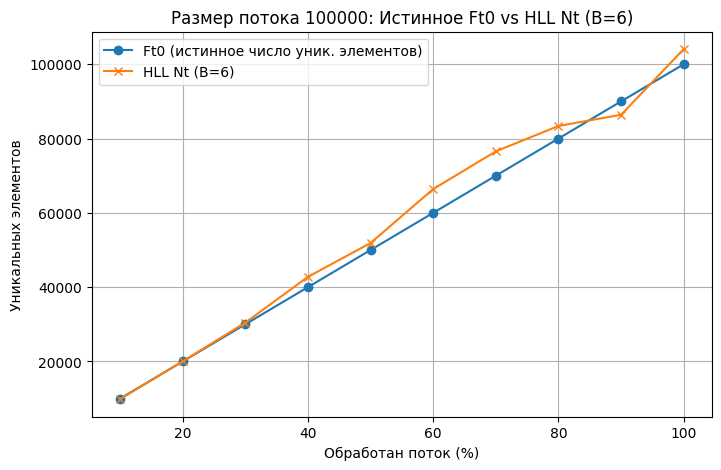

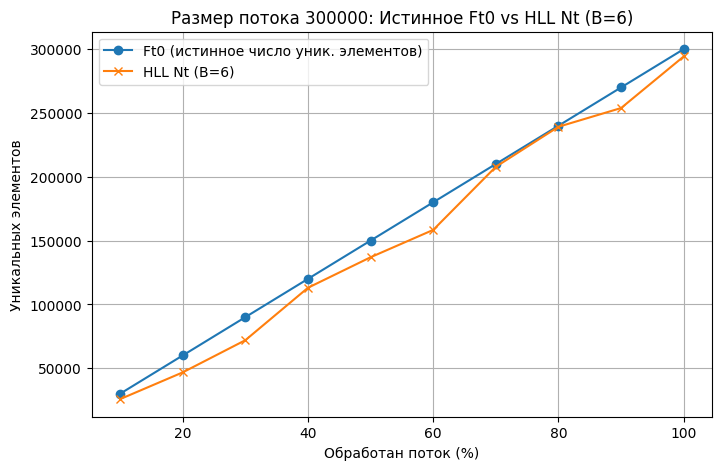

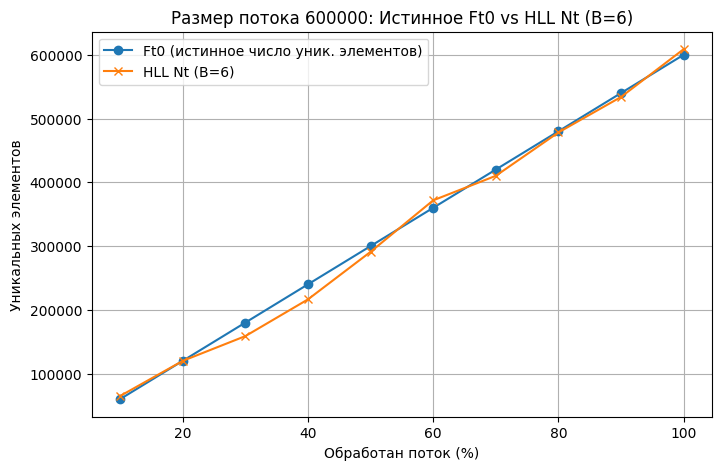

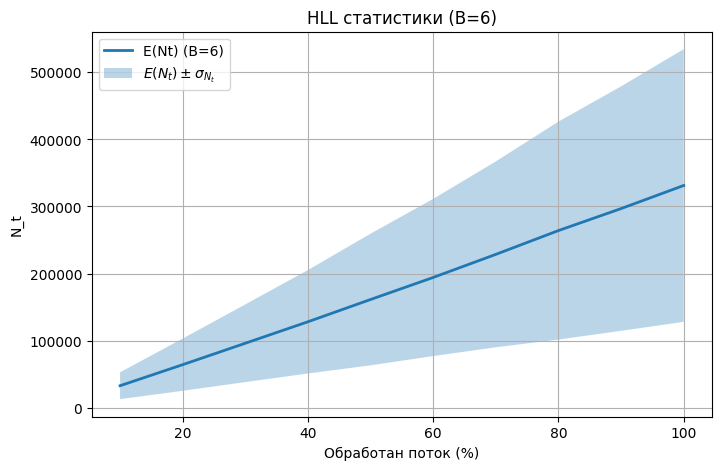

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv("per_run_results.csv")
agg = pd.read_csv("agg_stats_chosenB.csv")

Bs = sorted(df['B'].unique())
steps_count = agg.shape[0]
chosen_B = None
for B in Bs:
    cnt = df[df['B']==B]['step_index'].nunique()
    if cnt == steps_count:
        chosen_B = B
        break
if chosen_B is None:
    chosen_B = Bs[0]

for stream_size in sorted(df['stream_size'].unique()):
    d = df[(df['stream_size']==stream_size) & (df['B']==chosen_B)].sort_values('step_index')
    steps = d['processed_pct'].values
    Ft = d['Ft'].values
    Nt = d['Nt'].values
    plt.figure(figsize=(8,5))
    plt.plot(steps, Ft, label='Ft0 (истинное число уник. элементов)', marker='o')
    plt.plot(steps, Nt, label=f'HLL Nt (B={chosen_B})', marker='x')
    plt.xlabel('Обработан поток (%)')
    plt.ylabel('Уникальных элементов')
    plt.title(f'Размер потока {stream_size}: Истинное Ft0 vs HLL Nt (B={chosen_B})')
    plt.legend()
    plt.grid(True)
    fname = f"graph1_stream_{stream_size}.png"
    plt.savefig(fname, dpi=200, bbox_inches='tight')
    plt.show()

steps = agg['processed_pct'].values
meanNt = agg['mean_Nt'].values
stdNt = agg['std_Nt'].values

plt.figure(figsize=(8,5))
plt.plot(steps, meanNt, label=f"E(Nt) (B={chosen_B})", linewidth=2)
plt.fill_between(steps, meanNt - stdNt, meanNt + stdNt, alpha=0.3,
                 label=r"$E(N_t) \pm \sigma_{N_t}$")
plt.xlabel('Обработан поток (%)')
plt.ylabel('N_t')
plt.title(f'HLL статистики (B={chosen_B})')
plt.legend()
plt.grid(True)
fname = "graph2_mean_with_std_chosenB.png"
plt.savefig(fname, dpi=200, bbox_inches='tight')
plt.show()
